Programa escrito para testar as funções de cálculo de volume de ar nos pulmões, para ser usado como volume de referência no cálculo de potencial de recrutamento alveolar.

In [1]:
import ctFuncs as ctf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

# Lendo imagens

In [3]:
pasta = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/Recrutado_50mm'    # CT volumetrica

In [4]:
imagens = ctf.lePastaDICOM(pasta)

Size: (512, 512, 89); Spacing: (0.68359375, 0.68359375, 5.0)


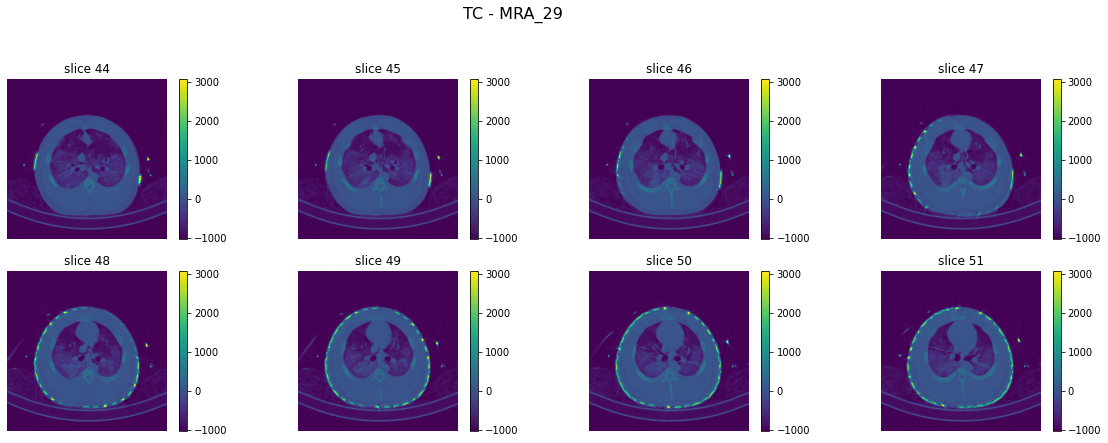

In [5]:
fig = ctf.mostraCortesDICOM(imagens,44,8,colorbar=True)
_= fig.suptitle('TC - MRA_29', fontsize=16)

# Segmentando pulmão

In [6]:
### Exemplo de código segmentando pulmão aerado:
# df = ctf.SegmentaPulmaoAerado(imagens)              # segmenta pulmao aerado
# _= ctf.mostraCortes(df.imagem.values,0,4)           # mostra imagens de ct completas
# _= ctf.mostraCortes(df.mascara_aerado.values,0,4)   # mostra mascaras do pulmao aerado
# plt.imshow(df.imagem.values[0])                     # mostra apenas um corte

In [7]:
df = ctf.SegmentaPulmaoCompleto(imagens, threshold=50)  # threshold para pulmão totalmente recrutado

Tamanho: 512 512 89


In [8]:
df.head(3)

,imagem,mascara_ar,imagem_ar,pulmao,traqueia,imagem_pulmao
0,"[[-1003, -991, -1000, -1006, -992, -999, -1015...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[-1015, -1000, -998, -1003, -1002, -995, -999...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[-987, -994, -1009, -1012, -1004, -1006, -100...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [9]:
## PARA INVESTIGAR...
#import SimpleITK as sitk
#img_aux = imagens[:,:,1]
#img_aux = sitk.GetImageFromArray(sitk.GetArrayFromImage(img_aux)) # sem isso não funciona!!!
#mask_pulmao_completo = ctf.SegmentaPulmaoCompletoImg(img_aux, threshold=50) # threshold para pulmão totalmente recrutado
#plt.imshow(ctf.I2A(mask_pulmao_completo))

#temp2 = ctf.I2A(imagens)
#print(f'Cuidado! Índices invertidos: {temp2[88][214,245]} = {imagens[245,214,88]}')

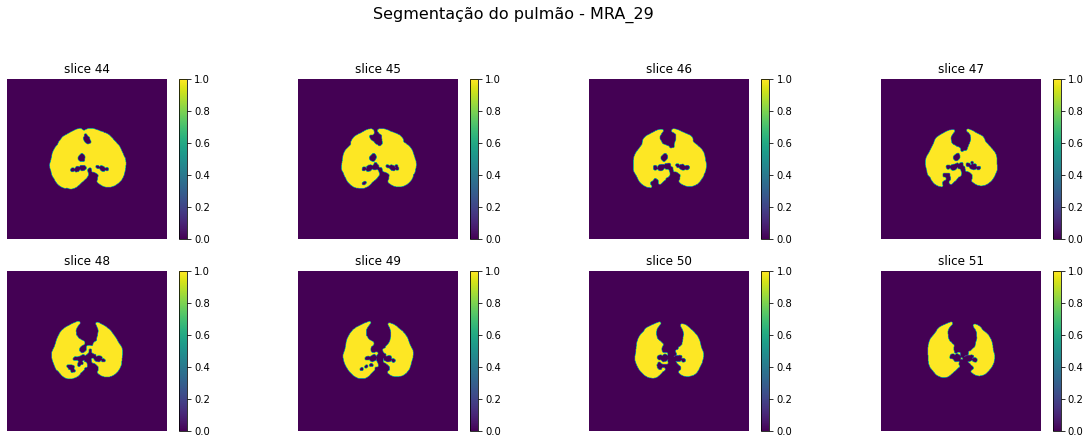

In [10]:
fig = ctf.mostraCortes(df.pulmao.values,44,8,colorbar=True)
_= fig.suptitle('Segmentação do pulmão - MRA_29', fontsize=16)

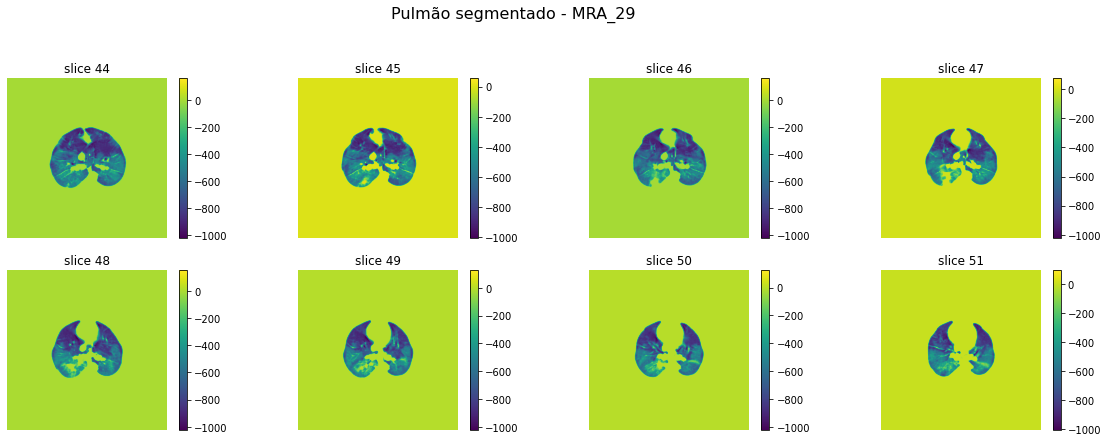

In [11]:
fig = ctf.mostraCortes(df.imagem_pulmao.values,44,8,colorbar=True)
_= fig.suptitle('Pulmão segmentado - MRA_29', fontsize=16)

# Calculando volume de ar

In [12]:
v_voxel_mL = np.prod(imagens.GetSpacing())/1000
volume_ar = ctf.calcula_volume_ar(df.imagem_pulmao.values,v_voxel_mL)
print(f'{volume_ar} mL')

1628.0315305233003 mL


# Verificando funções quando existe colapso

## MRA29 D1

Size: (512, 512, 86); Spacing: (0.68359375, 0.68359375, 5.000000000000001)
Tamanho: 512 512 86
468.0442544937135 mL


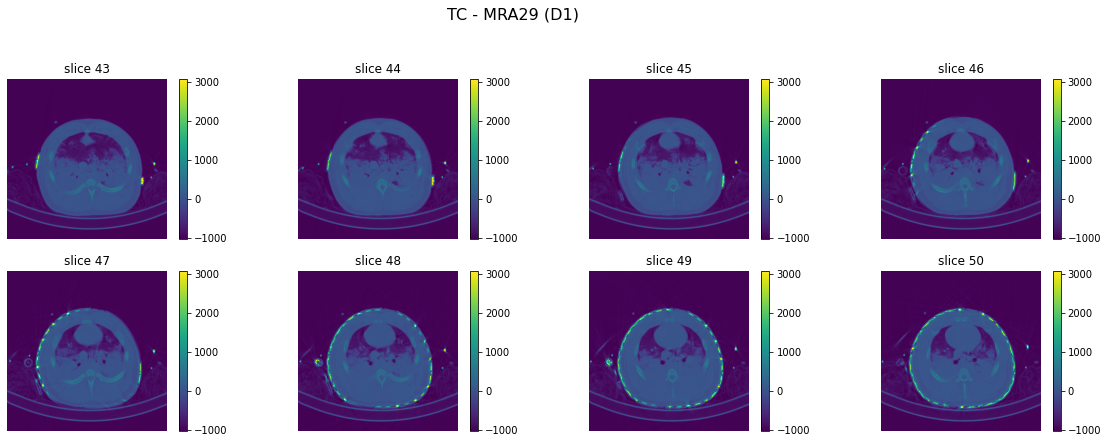

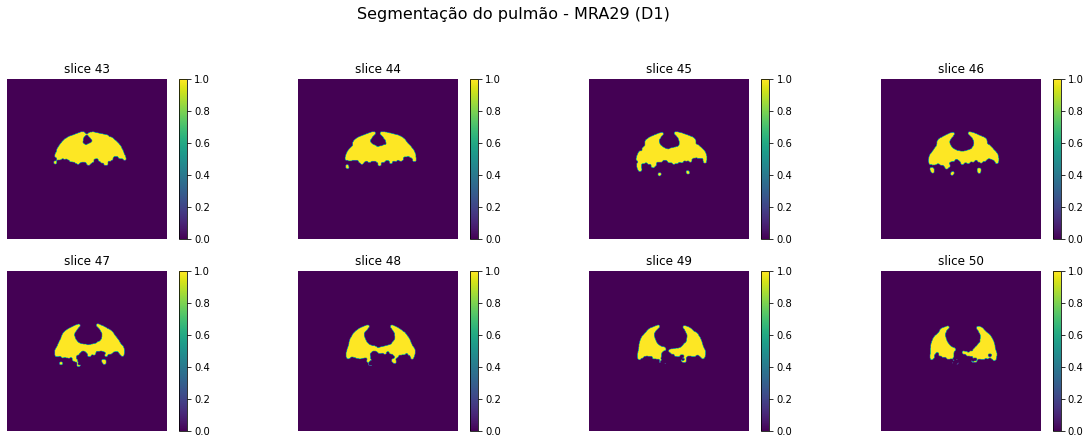

In [13]:
pasta_D1 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/D/Vol_Int_D1_10_50_mm_2'    # CT volumetrica
volume_ar_D1,imagens_D1,df_D1 = ctf.calcula_volume_pasta(pasta_D1, animal='MRA29 (D1)', mostraImagens = True)

## D5

In [14]:
pasta_D5 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/D/Vol_Int_D5_30_50_mm_6'    # CT volumetrica

In [15]:
_ = ctf.calcula_volume_pasta(pasta_D5, animal='MRA29 (D5)')

Size: (512, 512, 86); Spacing: (0.68359375, 0.68359375, 5.000000000000001)
Tamanho: 512 512 86
1253.796689462662 mL


## B1

In [16]:
pasta_B1 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/B/Vol_B1_10_50_mm_2'    # CT volumetrica
_ = ctf.calcula_volume_pasta(pasta_B1, animal='MRA29 (B1)')

Size: (512, 512, 88); Spacing: (0.68359375, 0.68359375, 5.0)
Tamanho: 512 512 88
494.9323979377746 mL


# Outros testes

Teste de segmentação completa do pulmão, incluindo parte colapsada.
Aparentemente não funciona com CT volumétrica, pela dificuldade de separar coração e diafragma da parte colapsada (valores HU similares).

Size: (512, 512, 86); Spacing: (0.68359375, 0.68359375, 5.000000000000001)
Tamanho: 512 512 86
468.0442544937135 mL


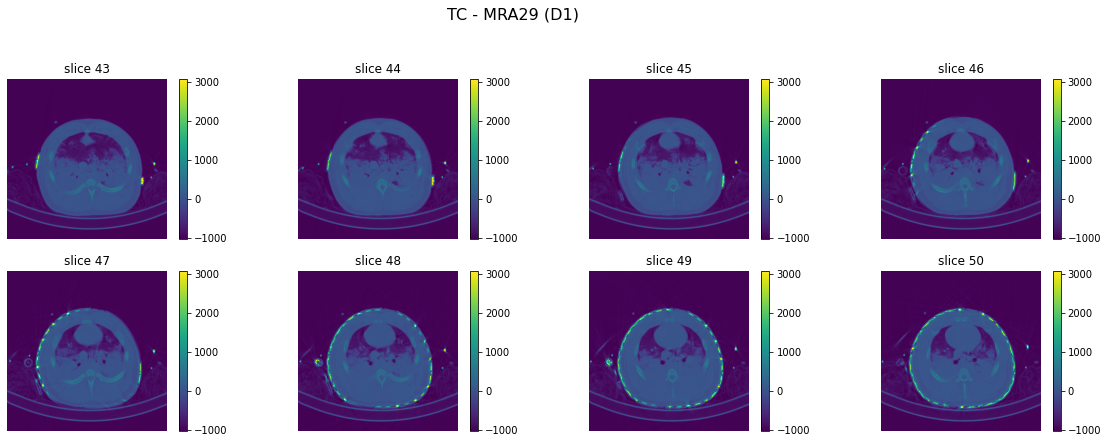

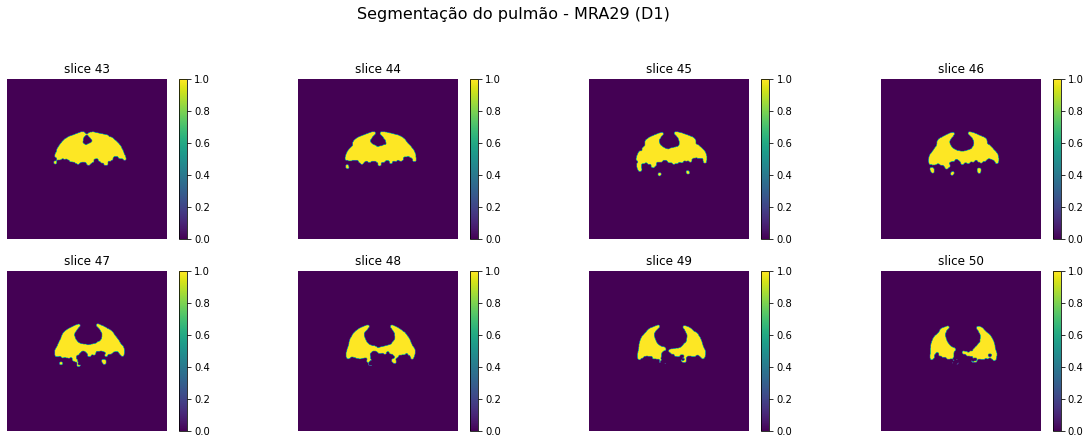

In [17]:
pasta_D1 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/D/Vol_Int_D1_10_50_mm_2'    # CT volumetrica
volume_ar_D1,imagens_D1,df_D1 = ctf.calcula_volume_pasta(pasta_D1, animal='MRA29 (D1)', mostraImagens = True)

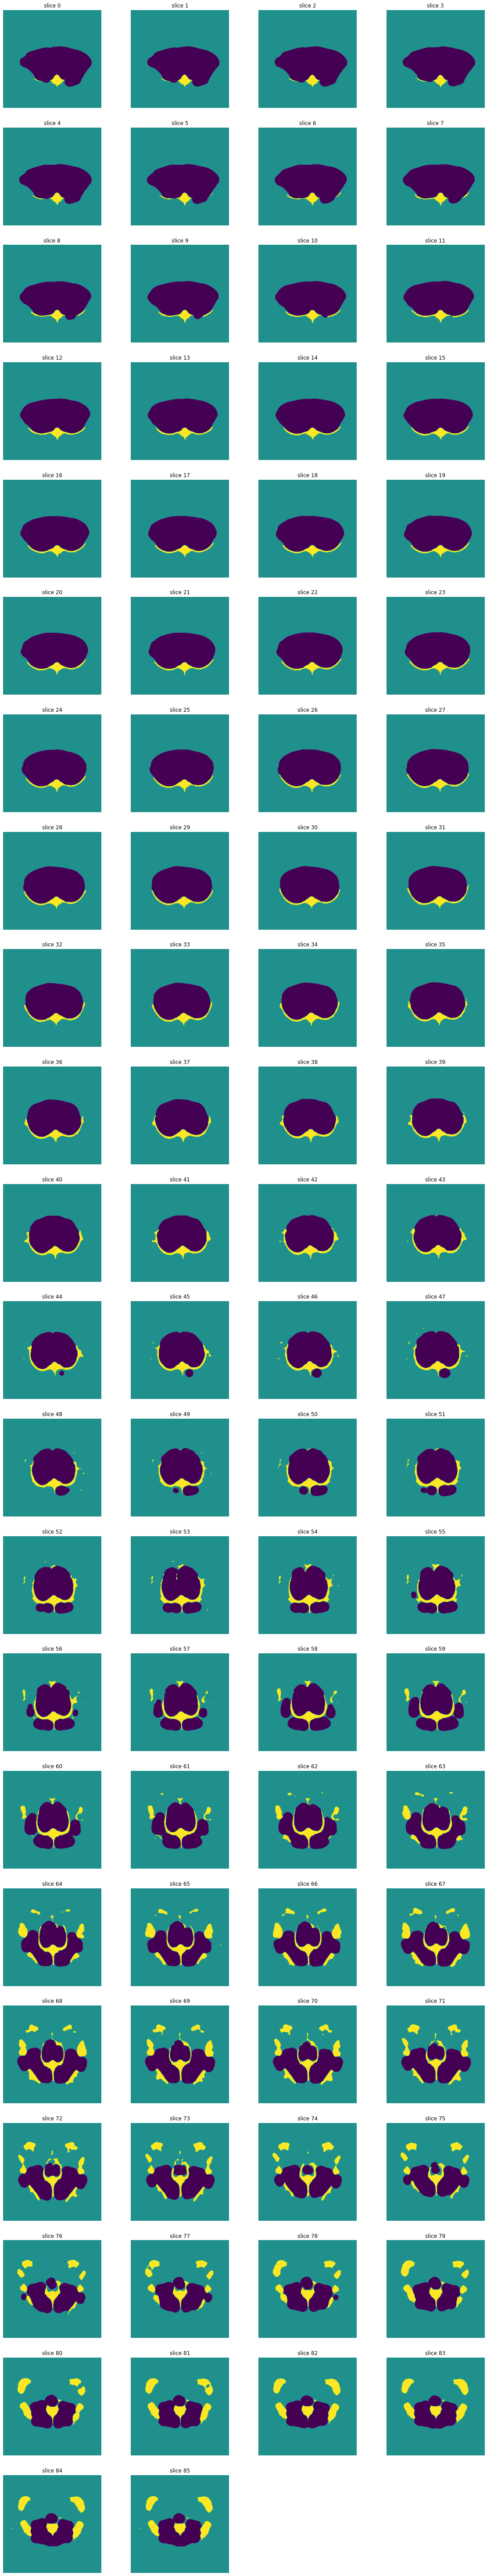

In [18]:
# FUNÇÃO NÃO FINALIZADA...
_= ctf.SegmentaPulmaoCompleto3D(imagens_D1)